class labels: [0 1 2]


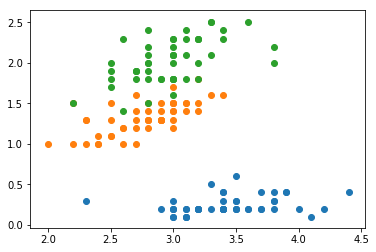

In [31]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
#loading iris data set from scikit-learn
%matplotlib inline

iris=datasets.load_iris()


x=iris.data[:,[1,3]]#the features
y=iris.target #the label


print ('class labels:',np.unique(y))#we use it to find the unique elements
plt.scatter(x[:50,0],x[:50,1])
plt.scatter(x[50:100,0],x[50:100,1])
plt.scatter(x[100:150,0],x[100:150,1])
plt.show()


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30, random_state=1, stratify=y)

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC



In [57]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

         # setup marker generator and color map
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        cmap = ListedColormap(colors[:len(np.unique(y))])

         # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], 
                        y=X[y == cl, 1],
                        alpha=0.8, 
                        c=colors[idx],
                        marker=markers[idx], 
                        label=cl, 
                        edgecolor='black')

        # highlight test samples
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]

            plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

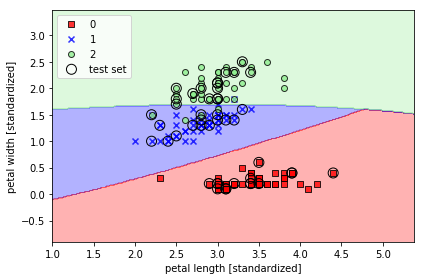

acc score: 1.0


In [58]:
import numpy as np

def SVC_test():
    X_combined_std = np.vstack((x_train, x_test))
    y_combined = np.hstack((y_train, y_test))
    svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
    svm.fit(x_train, y_train)

    plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    #plt.savefig('images/03_15.png', dpi=300)
    plt.show()
    y_pred = svm.predict(x_test)
    #print('Accuracy: %.2f' % svm.score(X_test_std, y_test))
    print('acc score:',svm.score(X_combined_std[105:150],y_combined[105:150]))
    SVC_accuracy=svm.score(X_combined_std[105:150],y_combined[105:150])
    
SVC_test()


In [60]:
pred=model.predict(x_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, pred))
print('accuracy is',accuracy_score(pred,y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      1.00      1.00        15
          2       1.00      1.00      1.00        15

avg / total       1.00      1.00      1.00        45

accuracy is 1.0
